# **Obesidad en países latinoamericanos.**

Reporte técnico del análisis estadístico de individuos en Colombia, Perú y México con respecto al IMC respectivo para un estudio de la **obesidad**.

**Hecho por: Estefania Nájera de la Rosa - estefania.najera@udem.edu a 19 de enero del 2026.**

In [56]:
# Importar librerías.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# 1.1 Introducción.

Para el presente análisis sobre la obesidad de los tres países latinoamericanos mencionados anteriormente, se utilizaron los datos recolectados por investigadores de la Universidad de la Costa, ubicada en el país de Colombia.

Esta recopilación de datos por parte de los investigadores surge a partir del incremento en los niveles de obesidad de la población de América Latina, tanto fue el crecimiento de esta complicación que ahora a la obesidad se le considera como un problema severo en la salud pública ya que puede tener implicaciones sociales, sanitarias y económicas en la sociedad de cada país.

# 1.2 Objetivo.

Con base en este contexto, el objetivo de este análisis es conocer qué variables influyen de manera significativa al momento de determinar si un individuo se encuentra dentro del umbral de la obesidad o no. 

Con esto sobre la mesa, se busca contribuir con cuáles son aquellos determinantes asociados a la población que se cataloga dentro de la obesidad en América Latina **hoy en día** para desarrollar estrategias que puedan implementarse lo antes posible para eventualmente revisar su desempeño y ver qué se pudo lograr gracias a estos hallazgos que a continuación se desglosan.

# 2.1 Descripción del conjunto de datos.

In [57]:
# Importamos los datos.
url = 'https://raw.githubusercontent.com/estefaniadelarosa/IA-I/refs/heads/main/A1.1%20Aprendizaje%20estad%C3%ADstico-autom%C3%A1tico/A1.1%20Obesidad.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(2111, 10)


,Sexo,Edad,Estatura,Peso,FamiliarConSobrepeso,ComeMuchasCalorias,ComeVegetales,Fumador,ConsumoDeAgua,NivelDeObesidad
0,Female,21.0,1.62,64.0,yes,no,2.0,no,2.0,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,yes,3.0,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,no,2.0,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,no,2.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,no,2.0,Overweight_Level_II


Una vez conociendo de dónde vienen nuestros datos y del por qué de la recolección de los mismos, es importante mencionar que tenemos 2111 registros, es decir, 2111 individuos que accedieron a compartir sus datos para poderlos dividir en 10 variables como secciones.

Estas 10 variables son las siguientes:
* Sexo.

* Edad.

* Estatura.

* Peso.

* Historial de familiares con sobrepeso.

* Consumo de calorías.

* Consumo de vegetales.

* Fumador o no.

* Consumo de agua (H2O).

* Nivel de obesidad.

In [58]:
# Estadísticas básicas individuales.
print("Estadísticas de la variable: Edad.")
print('Min = ', df['Edad'].min())
print('Max = ', df['Edad'].max())
print('Mean = ', df['Edad'].mean())

print("\nEstadísticas de la variable: Estatura.")
print('Min = ', df['Estatura'].min())
print('Max = ', df['Estatura'].max())
print('Mean = ', df['Estatura'].mean())

print("\nEstadísticas de la variable: Peso.")
print('Min = ', df['Peso'].min())
print('Max = ', df['Peso'].max())
print('Mean = ', df['Peso'].mean())

print("\nEstadísticas de la variable: ConsumoDeAgua.")
print('Min = ', df['ConsumoDeAgua'].min())
print('Max = ', df['ConsumoDeAgua'].max())
print('Mean = ', df['ConsumoDeAgua'].mean())

print("\nEstadísticas de la variable: Sexo.")
print('Mode = ', df['Sexo'].mode()[0]) # [0] para quitar el 0 que aparecía antes.

print("\nEstadísticas de la variable: NivelDeObesidad.")
print('Mode = ', df['NivelDeObesidad'].mode()[0]) # [0] para quitar el 0 que aparecía antes.

Estadísticas de la variable: Edad.
Min =  14.0
Max =  61.0
Mean =  24.312599908574136

Estadísticas de la variable: Estatura.
Min =  1.45
Max =  1.98
Mean =  1.7016773533870204

Estadísticas de la variable: Peso.
Min =  39.0
Max =  173.0
Mean =  86.58605812648035

Estadísticas de la variable: ConsumoDeAgua.
Min =  1.0
Max =  3.0
Mean =  2.0080114040738986

Estadísticas de la variable: Sexo.
Mode =  Male

Estadísticas de la variable: NivelDeObesidad.
Mode =  Obesity_Type_I


Para conocer a fondo nuestros datos, se realizó una rápida y breve exploración estadística de los mismos donde se obtuvieron dichos resultados:
* La **edad mínima** de las personas es de 14 años, mientras que el **máximo** es de 61 años con un **promedio** de 24 años.

* La **estatura mínima** de las personas es de 1.45 metros, mientras que el **máximo** es de 1.98 metros con un **promedio** de 1.70 metros.

* El **peso mínimo** de las personas es de 39 kilogramos, mientras que el **máximo** es de 173 kilogramos con un **promedio** de 86 kilogramos.

* El **consumo de agua (H2O) mínimo** de las personas es de 1 litro, mientras que el **máximo** es de 3 litros con un **promedio** de 2 litros.

* En el estudio, **predominan los registros de individuos del sexo másculino**, mientras que **dentro del nivel de obesidad, predominan los registros de la obesidad tipo uno**.

# 3.1 Definición de las variables de interés.

Una vez conociendo los datos a gran escala, es importante definir cuál será tanto nuestra **variable dependiente**, como la **variable independiente** antes de realizar una prueba estadística.

# 3.2 Variable dependiente.

Para elegir nuestra **variable dependiente**, es decir, la que se estará midiendo según el comportamiento de la variable independiente, se tomó en cuenta el contexto del reporte, siendo en este caso el de la obesidad, por lo que dicha variable a utilizar será la de: **NiveldeObesidad**.

Es importante mencionar que esta variable tiene varios niveles, donde según Nordisk (2025), estas son los rangos respectivos a cada clasificación:
* Obesidad nivel uno (30 <= IMC <= 34.9).

* Obesidad nivel dos (35 <= IMC <= 39.9).

* Obesidad nivel tres (IMC >= 40).

* Sobrepeso nivel uno (25.0 <= IMC <= 27.4)

* Sobrepeso nivel dos (27.5 <= IMC <= 29.9)

* Peso normal (18.5 <= IMC <= 24.9).

* Bajo de peso (IMC <= 18.5).

Ahora, para estos niveles, se tienen estos porcentajes de cuántos individuos corresponden a cada una:
* Obesidad nivel uno: 16.6%.

* Obesidad nivel dos: 14.1%.

* Obesidad nivel tres: 15.3%.

* Sobrepeso nivel uno 13.7%.

* Sobrepeso nivel dos: 13.7%.

* Peso normal: 14.0%.

* Bajo de peso: 12.9%.

In [59]:
# Categorías dentro de NivelDeObesidad
df['NivelDeObesidad'].value_counts()

NivelDeObesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [60]:
# Para el porcentaje.
df['NivelDeObesidad'].value_counts()/(df['NivelDeObesidad'].value_counts().sum())*100

NivelDeObesidad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: count, dtype: float64

# 3.3 Variable independiente.

Por otro lado, nuestra **variable independiente**, es decir, la que vamos a estar manipulando, se puede considerar a la variable de Peso, esto debido a que la misma tiene una relación directa con lo que es la obesidad, ya que es la principal variable con la que se calcula el índice de masa corporal (IMC), sin embargo, aún así se realizará una correlación para ver la relación entre esta variable con la ya establecida variable dependiente para ver si nuestra hipótesis es acertada y las mismas tienen un acercamiento moderado como mínima.

In [70]:
# Obtener la correlación.
correlacion = (df.corr(numeric_only=True)[['NivelDeObesidad_Num']].sort_values(by = 'NivelDeObesidad_Num', ascending = False))
correlacion

,NivelDeObesidad_Num
NivelDeObesidad_Num,1.000000
Peso,0.387643
FamiliarConSobrepeso_Num,0.313667
Edad,0.236170
ConsumoDeAgua,0.108868
ComeMuchasCalorias_Num,0.044582
Estatura,0.038986
Sexo_Num,0.024908
ComeVegetales,0.018522
Fumador_Num,-0.023256


Realizando la respectiva correlación, podemos observar que la variable más significativa con relación al nivel de obesidad, es la del peso, con un valor de 0.387643, lo que sugiere una relación moderada y siendo la más alta a comparación de las demás variables en el estudio; por lo que, esta será nuestra variable independiente.

# 4.1 Metodología.

# 4.2 Datos.

Para indagar más a fondo de la base de datos que tenemos en nuestras manos, se tuvieron que hacer diversos métodos para limpiar y transformar los datos para su eventual uso correcto, ya que sin los datos en un buen estado, no tendremos resultados correctos y/o coherentes.

Primero, se verificó que la base de datos no tuviera datos vacíos (no hay problema si hay datos duplicados ya que esto tiene coherencia en el estudio), una vez hecho esto y viendo que no había nulos, se prosiguió a estudiar qué tipos de datos tenemos, siendo estos numéricos o categóricos. Esto es muy importante de conocer ya que aquellos categóricos tienen que ser transformados para estudiar las correlaciones que tenemos en nuestras variables.

In [ ]:
# Verificar si hay datos vacíos.
df.isna().sum().sort_values(ascending = False)

In [ ]:
# Determinar el tipo de datos que tengo.
df.dtypes

In [63]:
# Convertimos las variables categóricas a categóricas numéricas.
from sklearn.preprocessing import LabelEncoder 

# Aplicamos la transformación.
df['Sexo_Num'] = LabelEncoder().fit_transform(df['Sexo'])
df['FamiliarConSobrepeso_Num'] = LabelEncoder().fit_transform(df['FamiliarConSobrepeso'])
df['ComeMuchasCalorias_Num'] = LabelEncoder().fit_transform(df['ComeMuchasCalorias'])
df['Fumador_Num'] = LabelEncoder().fit_transform(df['Fumador'])
df['NivelDeObesidad_Num'] = LabelEncoder().fit_transform(df['NivelDeObesidad'])

df.sample(5)

,Sexo,Edad,Estatura,Peso,FamiliarConSobrepeso,ComeMuchasCalorias,ComeVegetales,Fumador,ConsumoDeAgua,NivelDeObesidad,Sexo_Num,FamiliarConSobrepeso_Num,ComeMuchasCalorias_Num,Fumador_Num,NivelDeObesidad_Num
1875,Female,18.378203,1.746061,128.261402,yes,yes,3.000000,no,2.501638,Obesity_Type_III,0,1,1,0,4
591,Male,19.556729,1.767563,56.307019,yes,yes,2.362918,no,2.358172,Insufficient_Weight,1,1,1,0,0
254,Female,22.000000,1.640000,56.000000,yes,no,3.000000,no,2.000000,Normal_Weight,0,1,0,0,1
589,Female,19.948140,1.530884,39.371523,no,yes,1.522001,no,1.981260,Insufficient_Weight,0,0,1,0,0
1557,Male,28.704462,1.762887,113.901980,yes,yes,2.323351,no,2.165048,Obesity_Type_II,1,1,1,0,3


Una vez con nuestra base de datos establecida, para poder estudiarla de forma visual, se realizaron diversos gráficos que se explicarán a continuación.

El siguiente histograma es para ver los diferentes pesos registrados en nuestra base de datos junto a la frecuencia de las mismas variaciones de registros, podemos observar que la moda en cuánto al peso en kilogramos es alrededor de 70 a 80 kilogramos.

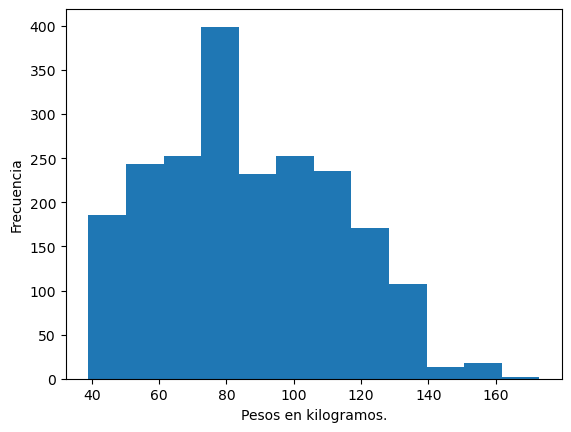

In [65]:
df['Peso'].plot(kind = 'hist', bins = 12)
plt.xlabel('Pesos en kilogramos.')
plt.ylabel('Frecuencia')
plt.show()

Para observar estos mismos pesos registrados pero ahora en un Boxplot, obtenemos que el valor mínimo es de 40, mientras que el máximo llega a un poco más de 160, teniendo en cuenta la existencia de un outlier con una diferencia muy grande con este 160 que es el "tope" brindado por el gráfico.

Para nuestros cuartiles, obtenemos la siguiente estadística:
* Q1 (25%): alrededor de un poco más de 60 kilogramos.

* Q2/Mediana (50%): alrededor de 80 kilogramos.

* Q3 (75%): alrededor de un poco más de 100 kilogramos.

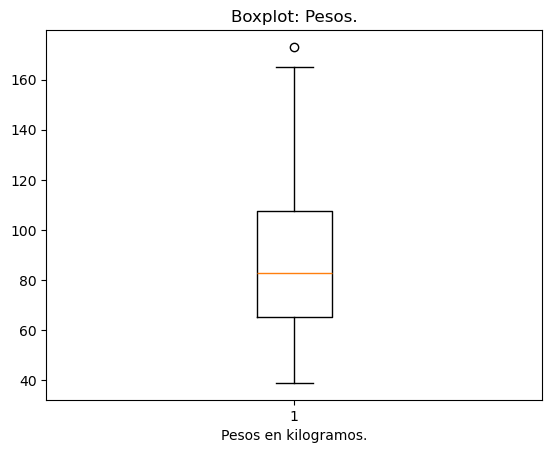

In [66]:
plt.boxplot(df['Peso'].dropna())
plt.title('Boxplot: Pesos.')
plt.xlabel('Pesos en kilogramos.')
plt.show()

Como nuestra variable independiente es la de: 'NiveldeObesidad', se decidió ver la misma mediante un gráfico de Pie, donde primero se tuvo que realizar la tabla de frecuencias relativa para eventualmente graficar los porcentajes obtenidos y observar las divisiones de una manera más atractiva y clara.

In [67]:
# Proporción.
tabla_frec_rel1 = (df['NivelDeObesidad'].value_counts() / df['Peso'].value_counts().sum())*100
tabla_frec_rel1

NivelDeObesidad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: count, dtype: float64

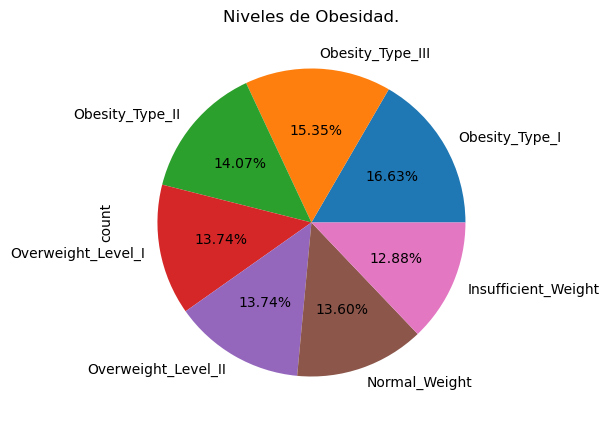

In [68]:
tabla_frec_rel1.plot(kind = 'pie', title = 'Niveles de Obesidad.', autopct = '%.2f%%', figsize = (5,5))
plt.show()

# 4.3 Prueba.

Para la prueba estadística, se realizará la prueba H de Kruskal-Wallis ya que según Ortega (2023), esta prueba no paramétrica consiste en corroborar si existen diferencias relevantes a nivel estadístico entre dos o más grupos de una variable independiente en una variable dependiente ordinal o continua.

Este escenario es clave para el estudio ya que tenemos una variable dependiente que se puede utilizar ya sea ordinal o continua pero con una variable independiente que estrictamente es continua al estarse tratando de pesos.

Dicha prueba determina si las medianas de los grupos en juego son diferentes o no, calculando un estadístico de prueba y comparándolo con un punto de corte de la distribución.

Nuestras hipótesis serán las siguientes:
* **H0: La distribución del peso en kilogramos es la misma en todos los niveles de obesidad (p > 0.05).** 
* **H1: La distribución del peso en kilogramos no es la misma en todos los niveles de obesidad (p < 0.05).**

In [69]:
from scipy import stats 

grupos = [df[df['NivelDeObesidad'] == nivel]['Peso']
    for nivel in df['NivelDeObesidad'].unique()
]

result = stats.kruskal(*grupos)

result

KruskalResult(statistic=np.float64(1822.167213149714), pvalue=np.float64(0.0))

# 5.1 Resultados. 

Después de realizar la prueba H de Kruskal-Wallis con la variable independiente del Peso y la variable depende del NivelDeObesidad, se obtuvo un estadístico H de 1822.17 aproximadamente, con un valor de p que es menor a 0.05, es decir, a un nivel de significancia del 95%, por lo que se concluye que la **hipótesis nula se rechaza** y se **acepta la hipótesis alternativa** donde **la distribución del peso en kilogramos no es la misma en todos los niveles de obesidad**.

# 6.1 Discusiones.

Para este estudio, no se tuvieron dificultades a gran escala, esto a que ya se tenía el conocimiento de cómo manipular Jupyter Notebook junto con Python para realizar reportes junto a su código respectivo, lo único que se puede considerar cómo un reto fue la redacción, tratando que la misma fuera lo más clara posible para evitar caer en el lenguaje técnico o que se tenga que recorrer al código para leer el mismo y así comprender lo que no se pudo explicar en simples palabras.

# 7.1 Conclusiones.

Para concluir, este estudio nos demuestra que para cada nivel de obesidad, se tiene una distribución de peso respectiva, lo cuál tiene completamente sentido y se apoya esta hipótesis con lo mencionado en la definición de nuestra variable dependiente que es la de NivelDeObesidad, donde dichas clases dentro de esta variable dependen de el IMC, que en este caso lo probamos con la variable independiente de Peso, elemento clave en el chequeo médico para realizar este cálculo.

# 7.2 Aprendizajes.

Los aprendizajes de dicho estudio se centran en lo que es un proceso de inferencia, para conocer los datos brindados, es decir, comprender la asociación entre la salida y entrada, que en este caso fue encontrar dicha asociación entre las variables de NivelDeObesidad y el Peso.

Dicha construcción de la prueba estadística fue muy interesante ya que la gran mayoría de veces cuando se habla de aprendizaje en la computación, se trata sobre el aprendizaje de máquina para construir algoritmos que sean modelos de predicción; no se trata de entender los datos a hoy en día ya que se pasa por largo, por eso en esta ocasión fue de mucho interés y enriquecimiento.

# 7.3 Implicaciones.

Las implicaciones de este estudio son masivas y de una gran importancia ya que con lo descubierto, se pueden analizar y recolectar datos que nos muestran significancia con el nivel de obesidad, donde con una investigación más profunda, se puede llegar a conclusiones más exactas y que las partes interesadas y con relación al sector de la salud y economía, se tomen las medidas necesarias para trabajar con los niveles de obesidad actuales, además de ver cómo se pueden prevenir estas tazas que afectan no solo a los individuos respectivos, sino también a el país entero, ya que este problema se va haciendo como una bola de nieve si no se trata con el tiempo - esto dentro de los tres países involucrados en este estudio, donde los resultados y conclusiones pueden llegar a más países de la región.

# 7.4 Limitaciones.

Una de las limitaciones existentes para este estudio viene por parte de la recolección de datos, ya que se hubiera tenido información más enriquecedora y valiosa para toda la región si se hubieran obtenido datos de otros países.

# 7.5 Posibles líneas futuras.

Sin embargo, haciendo referencia a la limitación mencionada, aún así esta se puede convertir en una posible línea futura en el alcance de este estudio, al ahora si abarcar estos países restantes de la región.

# 8.1 Referencias.

GeeksforGeeks. (2022). How to Perform a KruskalWallis Test in Python. GeeksforGeeks. https://www.geeksforgeeks.org/python/how-to-perform-a-kruskal-wallis-test-in-python/

Nordisk, N. (2025). Obesidad clase 1, 2 y 3: ¿Cuál es la diferencia? https://www.laverdaddesupeso.es/que-es-la-obesidad/tipos-obesidad-1-2-3-diferencias.html

Ortega, C. (2023). Prueba de Kruskal-Wallis: Qué es, ventajas y cómo se realiza. QuestionPro. https://www.questionpro.com/blog/es/prueba-de-kruskal-wallis/

# 9.1 Código de Honor de la Universidad de Monterrey.

Doy mi palabra que he realizado esta actividad con integridad académica.